In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score

np.random.seed(42)

In [2]:
dataset = np.genfromtxt('./Dados/quake.csv', delimiter=',')

In [3]:
class xscale():
 def __init__(self):
  self.mean = None
  self.dp = None
 def fit(self, data):
  self.mean = data.mean(axis=0)
  self.dp = data.std(axis=0)
 def transform(self, data):
  return (data - self.mean) / self.dp

 def inversa(self, data):
  return (data * self.dp) + self.mean

In [4]:
schedr_X = xscale()
schedr_X.fit(dataset)
X_sched = schedr_X.transform(dataset)

## Questão 1 - K-means

In [5]:
def Kmeans(K, dataset, n_init):
    D = dataset.shape[1]
    n = len(dataset)
    data = np.c_[dataset, np.zeros(n)]
    tol = 0.001

    initCtroids = []
    initError = []
    initHist = []
    hist_C = []

    for i in range(n_init):
        histErros = []
        ctroids = np.zeros((D,K))
        for i in range(K):
            iRamdom=np.random.randint(0,len(dataset))
            ctroids[:, i] = dataset[iRamdom]
        previousError = 0
        dif = 999
        while dif > tol:          
            distEuclidiana = np.zeros((n,K))
            for k in range(K):
                distk = np.sqrt(np.sum((dataset-ctroids[:,k])**2,axis=1))
                distEuclidiana[:,k]=distk
            C=np.argmin(distEuclidiana,axis=1)
            data[:, -1] = C
            grps  = np.unique(data[:, -1])
            erro_recon = 0
            for grp in grps:
                X_grp = data[:,0:D][data[:, -1] == grp]            
                m_grp = np.sum(X_grp, axis = 0)/len(X_grp)
                ctroids[:, int(grp)] = m_grp
                erro_recon = erro_recon + np.sum(np.power((X_grp-ctroids[:, int(grp)]),2))
            dif = np.abs(erro_recon - previousError)
            histErros.append(erro_recon)
            previousError = erro_recon

        initError.append(np.min(histErros))
        initHist.append(histErros)
        initCtroids.append(ctroids)

        bestCtroid = initCtroids[np.argmin(initError)]
        bestHist = initHist[np.argmin(initError)]
        minError = np.min(initError)

        distEuclidiana = np.zeros((n,K))
        for k in range(K):
            distk = np.sqrt(np.sum((dataset- bestCtroid[:,k])**2,axis=1))
            distEuclidiana[:,k]=distk

        C=np.argmin(distEuclidiana,axis=1)
        hist_C.append(C)
        bestC = hist_C[np.argmin(initError)]
    return  bestCtroid, bestHist, bestC, minError

In [6]:
errors = []
index_db = []
BetterDB = 999
BetterK = 1
for k in range(2,21):
    bestCtroid, bestHist, bestC, minError = Kmeans(k, X_sched, 100)
    errors.append(minError)
    DB = davies_bouldin_score(X_sched, bestC)
    index_db.append(DB)
    if DB < BetterDB:
        BetterDB = DB
        BetterK = k
    print("Valor K = {}".format(k))
    print("Erro de reconstrução = {}".format(minError))
    print("Índice DB = {}".format(DB))
    print("====")
print("Melhor Indice DB é {} para K = {}".format(BetterDB, BetterK))

Valor K = 2
Erro de reconstrução = 2295.2252253804904
Índice DB = 0.8994185058103716
====
Valor K = 3
Erro de reconstrução = 1309.8195847788757
Índice DB = 0.6610886397316416
====
Valor K = 4
Erro de reconstrução = 723.9398901490845
Índice DB = 0.6139971288313492
====
Valor K = 5
Erro de reconstrução = 585.5476037125754
Índice DB = 0.6198877363707009
====
Valor K = 6
Erro de reconstrução = 471.18768959672053
Índice DB = 0.6197034824012718
====
Valor K = 7
Erro de reconstrução = 385.9111645635743
Índice DB = 0.6341943251982255
====
Valor K = 8
Erro de reconstrução = 309.6117871555641
Índice DB = 0.7257655285278508
====
Valor K = 9
Erro de reconstrução = 255.9174773589703
Índice DB = 0.6521289991821508
====
Valor K = 10
Erro de reconstrução = 211.96772763293376
Índice DB = 0.6123709111727408
====
Valor K = 11
Erro de reconstrução = 181.55676624544245
Índice DB = 0.6248783507255371
====
Valor K = 12
Erro de reconstrução = 158.06459206187654
Índice DB = 0.5757742255031947
====
Valor K = 13

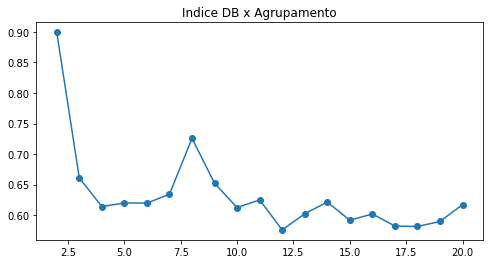

In [7]:
ticks = list(range(2,21))
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title('Indice DB x Agrupamento')
ax.plot(ticks,index_db,'-o')
plt.show()